Regresión Logística con Python

En el siguiente ejemplo examinaremos datos para clasificar si un usuario que visita un sitio web usa sistema operativo Windows, Macintosh o Linux.

Entradas:
    *Duracion de la visita
    *Cantidad de páginas visitadas
    *Cantidad de Acciones del usuario(Click, scroll, uso de checkbox,slider,etc)
    *Suma del valor de las acciones

Salidas:
    0.Windows
    1.Macintosh
    2.Linux

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
#Importamos el archivo csv
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


In [4]:
#para ver los estadísticos del dataframe
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
#veamos cuantos usuarios tenemos de cada tipo
print(dataframe.groupby("clase").size())

clase
0    86
1    40
2    44
dtype: int64


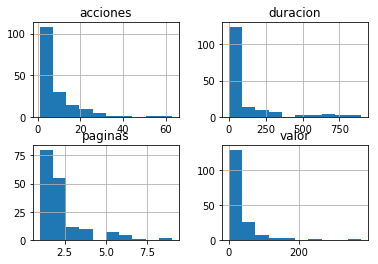

In [6]:
#Veamos los histogramas de cada variable
dataframe.drop(["clase"],1).hist()
plt.show()

/home/angel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/angel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


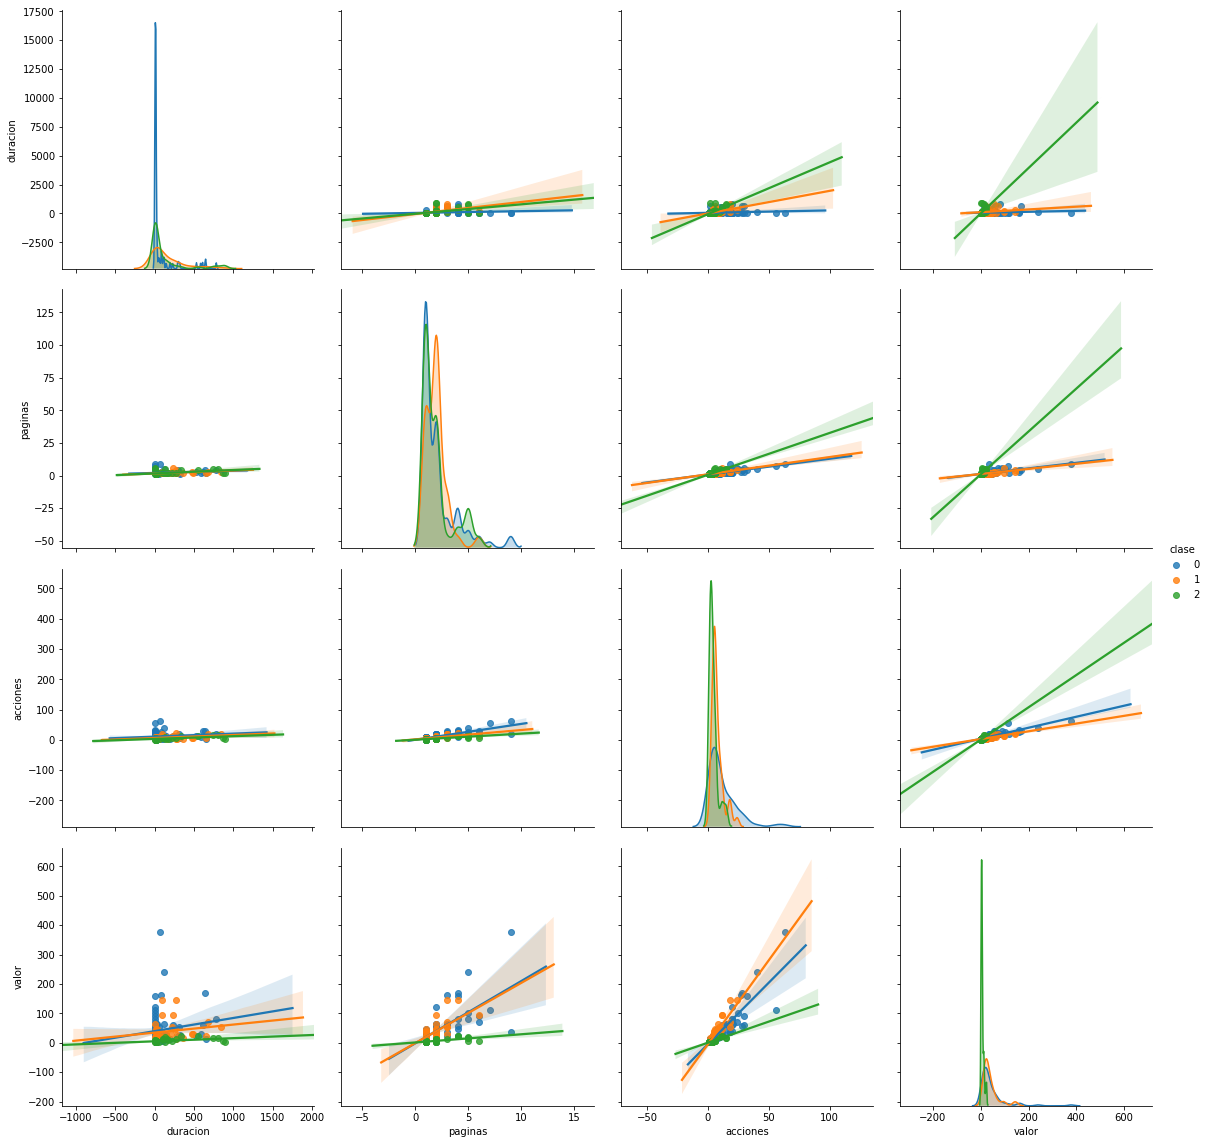

In [10]:
#Veamos como se interrelacionan las variables de entrada
#entre ellas para cada sistema operativo
sb.pairplot(dataframe.dropna(), 
            hue='clase',size=4, 
            vars=["duracion", "paginas", 
                  "acciones", "valor"],
            kind='reg')

In [11]:
#Creemos el modelo de regresion logística
x = np.array(dataframe.drop(["clase"],1))
y = np.array(dataframe["clase"])
x.shape
#Shape nos indica que tenemos 170 registros con 4 variables

(170, 4)

In [17]:
#Regresion logística
model = linear_model.LogisticRegression()
model.fit(x,y)

print("Presicion de modelo: ",model.score(x,y))

Presicion de modelo:  0.7764705882352941


In [23]:
pron = model.predict(x)
print("Pronóstico: ",pron[0:5])

Pronóstico:  [2 2 2 2 2]


In [24]:
dataframe.head(5)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [27]:
#Ahora dividiremos nuestra data en data de entrenamiento
#y de validación

val_size=0.2
seed=7
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size = val_size,random_state = seed)


In [28]:
nombre = "Regresión Logística"
kfold = model_selection.KFold(n_splits = 10, random_state=seed)
cv_results = model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring="accuracy")
msg="%s: %f (%f)" %(nombre,cv_results.mean(),cv_results.std())
print(msg)

Regresión Logística: 0.743407 (0.115752)


In [29]:
pred = model.predict(xtest)
print(accuracy_score(ytest,pred))


0.8529411764705882


In [35]:
np.transpose(ytest)

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2], dtype=int64)

In [37]:
xtest

array([[ 12.   ,   1.   ,   6.   ,  48.   ],
       [ 12.   ,   1.   ,   1.   ,   4.   ],
       [  1.425,   4.   ,  28.   ,  56.   ],
       [ 12.   ,   1.   ,   6.   ,  18.   ],
       [  1.59 ,   4.   ,  32.   , 160.   ],
       [ 12.   ,   1.   ,   2.   ,   6.   ],
       [ 12.   ,   1.   ,   2.   ,   2.   ],
       [ 13.   ,   1.   ,   7.   ,  35.   ],
       [ 15.   ,   2.   ,  20.   ,  60.   ],
       [ 12.   ,   1.   ,   3.   ,   6.   ],
       [ 13.   ,   1.   ,   6.   ,  30.   ],
       [ 87.   ,   3.   ,   9.   ,  36.   ],
       [ 12.   ,   1.   ,   6.   ,  24.   ],
       [ 11.   ,   1.   ,   3.   ,   6.   ],
       [ 15.   ,   2.   ,   2.   ,   4.   ],
       [278.   ,   2.   ,   4.   ,  28.   ],
       [485.   ,   2.   ,   6.   ,  30.   ],
       [  1.284,   4.   ,  16.   ,  48.   ],
       [ 12.   ,   1.   ,   1.   ,   1.   ],
       [  9.   ,   1.   ,   1.   ,   1.   ],
       [798.   ,   5.   ,  15.   ,  15.   ],
       [ 11.   ,   1.   ,   1.   ,   2.   ],
       [ 1

In [44]:
print("Número de registros en el test: ",len(ytest))
print("\n\nMatriz de Confusión: \n")
print(confusion_matrix(ytest,pred))
#La matriz de confusión muestra cuantos resultados
#erroneos tuvo cada clase (los que están fuera 
#de la diagonal).

#Podemos ver que pronosticó 3 usuarios de Mac como
#de Windows y 2 de Linux que eran de Windows

Número de registros en el test:  34


Matriz de Confusión: 

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [49]:
#Reporte de clasificacion:
print(classification_report(ytest,pred))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86        18
          1       1.00      0.50      0.67         6
          2       0.83      1.00      0.91        10

avg / total       0.87      0.85      0.84        34



In [50]:
#Hagamos un nuevo pronóstico con los siguientes valores
xnew = pd.DataFrame({"duracion":[10],"paginas":[3],"acciones":[5],"valoracion":9})
model.predict(xnew)

array([2], dtype=int64)